In [26]:
# Import Libraries
import requests,pandas as pd,numpy as np
from pandas import DataFrame
from io import StringIO
import time,json
from datetime import date
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
import os
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [27]:
os.getcwd()

'C:\\Users\\HP\\Downloads\\Batch 93 Day39'

In [28]:
# Load Data Set

os.chdir('C:\\Users\\HP\\Downloads\\Batch 93 Day39\\')

In [29]:
df_fx_data=pd.read_csv('BOE-XUDLERD.csv')
df_fx_data

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608
...,...,...
10832,1975-01-08,0.7554
10833,1975-01-07,0.7510
10834,1975-01-06,0.7524
10835,1975-01-03,0.7585


In [30]:
# Check Data Type

df_fx_data.dtypes

Date      object
Value    float64
dtype: object

In [31]:
# Convert Date to Date Time Data Type
df_fx_data['Date']=pd.to_datetime(df_fx_data['Date'])
df_fx_data

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608
...,...,...
10832,1975-01-08,0.7554
10833,1975-01-07,0.7510
10834,1975-01-06,0.7524
10835,1975-01-03,0.7585


In [32]:
df_fx_data.dtypes

Date     datetime64[ns]
Value           float64
dtype: object

In [33]:
# Convert the data to index column

indexd_df=df_fx_data.set_index('Date')
indexd_df

,Value
Date,
2017-11-09,0.8603
2017-11-08,0.8631
2017-11-07,0.8639
2017-11-06,0.8631
2017-11-03,0.8608
...,...
1975-01-08,0.7554
1975-01-07,0.7510
1975-01-06,0.7524


In [34]:
# Create Time Series

ts=indexd_df['Value']
ts

Date
2017-11-09    0.8603
2017-11-08    0.8631
2017-11-07    0.8639
2017-11-06    0.8631
2017-11-03    0.8608
               ...  
1975-01-08    0.7554
1975-01-07    0.7510
1975-01-06    0.7524
1975-01-03    0.7585
1975-01-02    0.7633
Name: Value, Length: 10837, dtype: float64

(10837,)


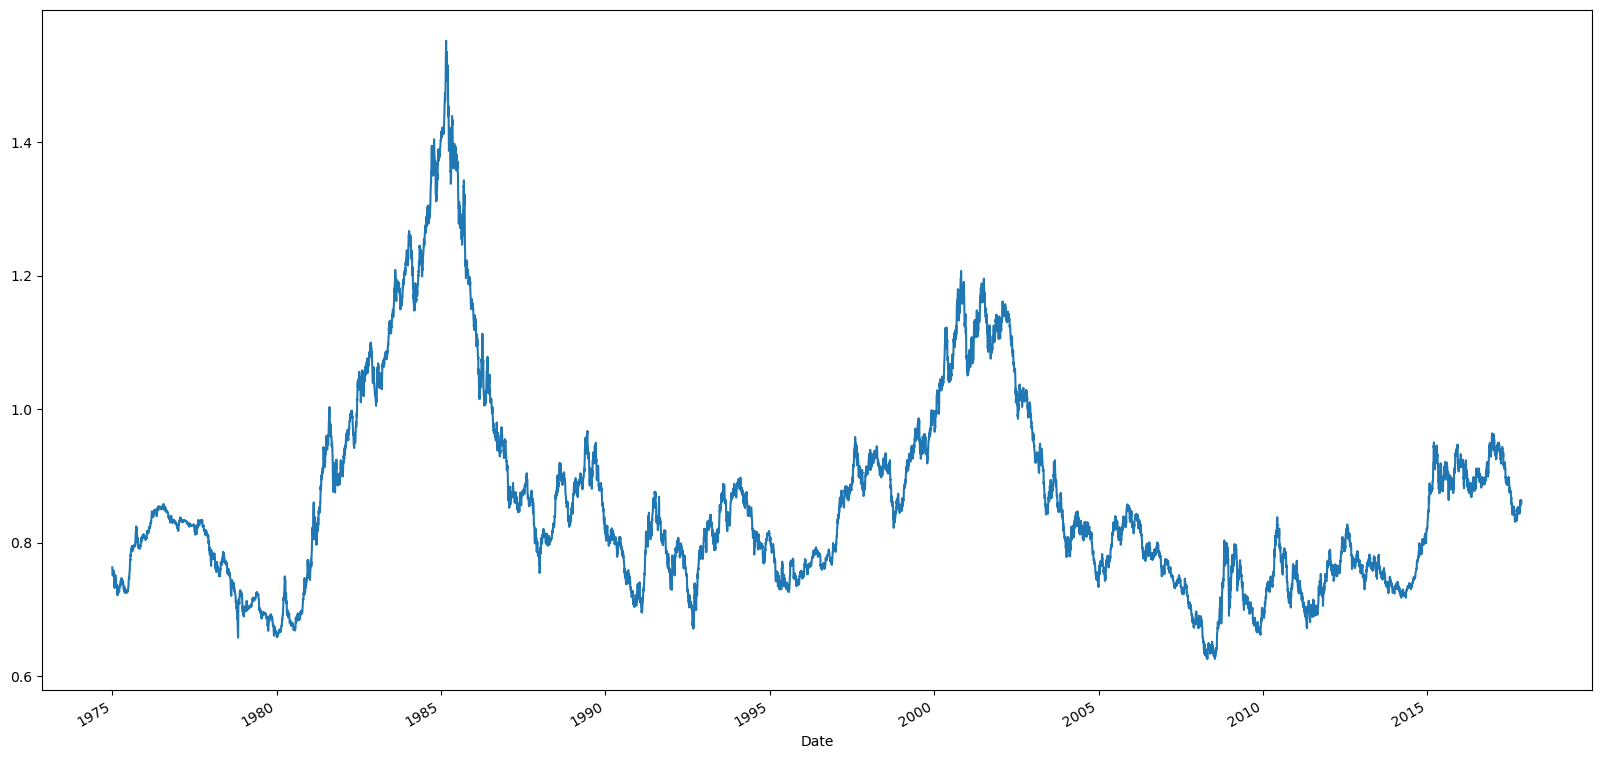

In [35]:
# Plot the Graph

ts.plot()
print(ts.shape)

(2237,)


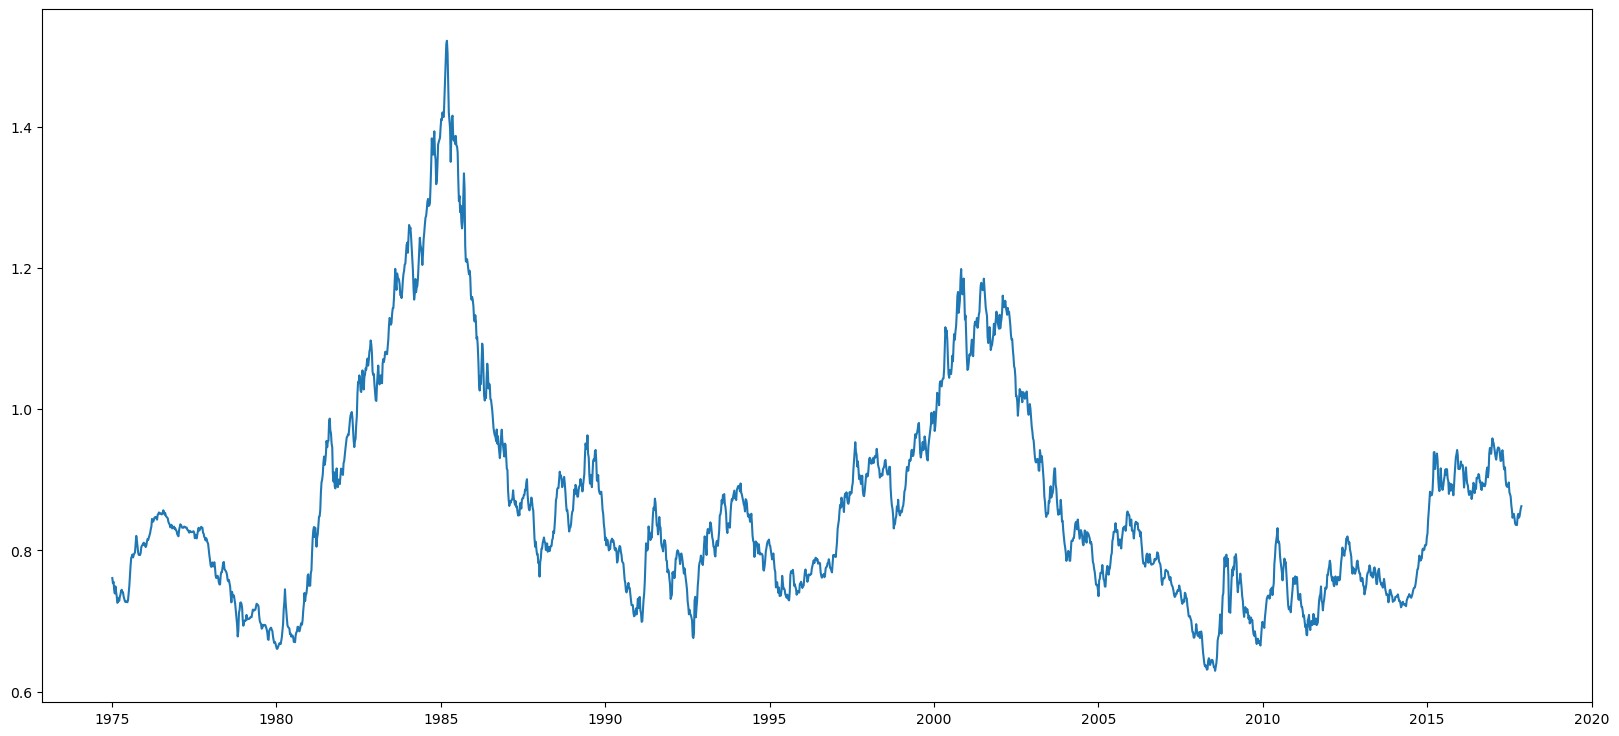

In [36]:
# Resample the Data at week wise and plot Graph - D,W,M,Y,3M etc
rcParams['figure.figsize']=20,9
ts_week=ts.resample('W').mean()
print(ts_week.shape)
plt.plot(ts_week)

(515,)


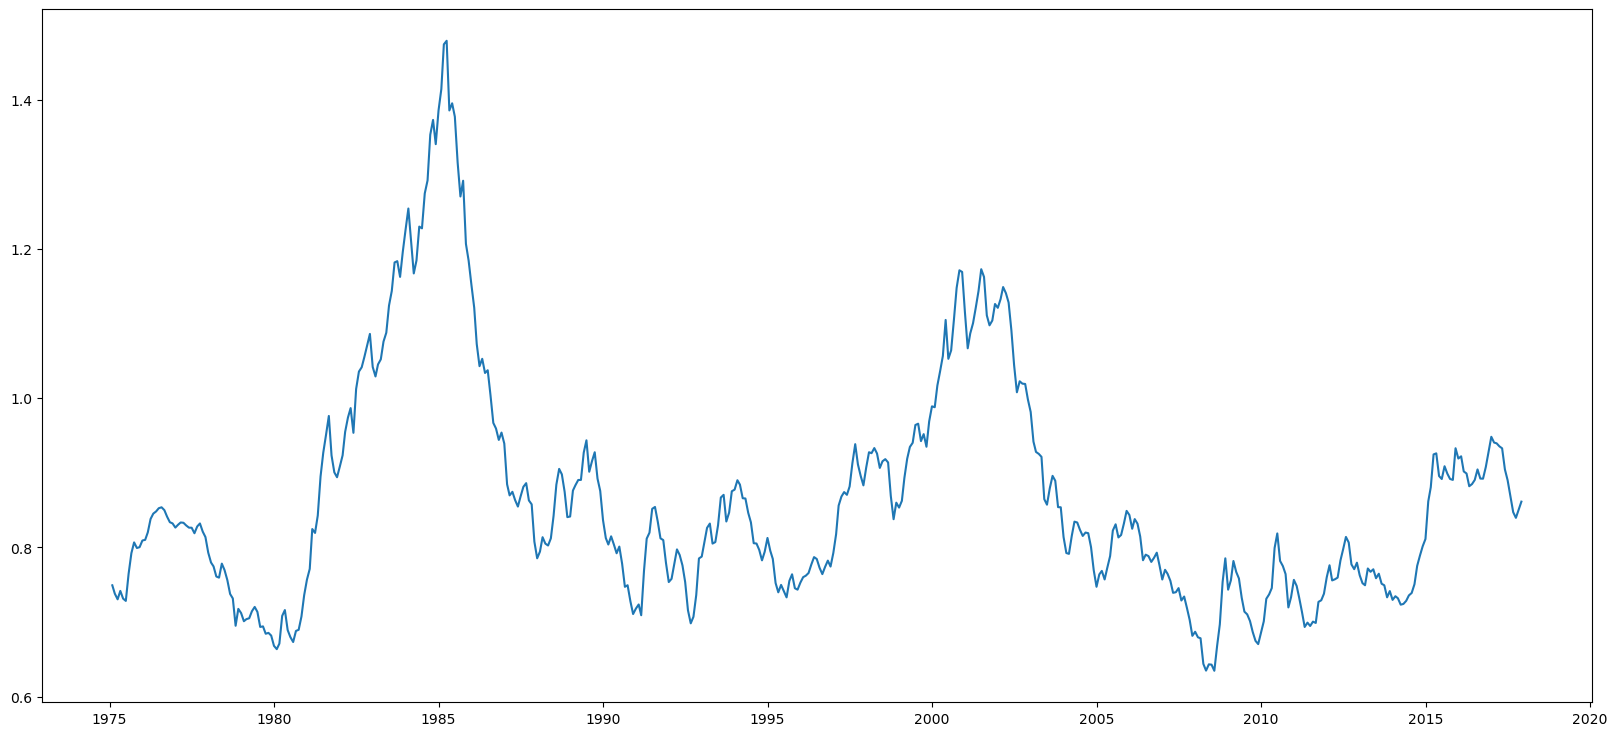

In [37]:
ts_week=ts.resample('M').mean()
print(ts_week.shape)
plt.plot(ts_week)

(43,)


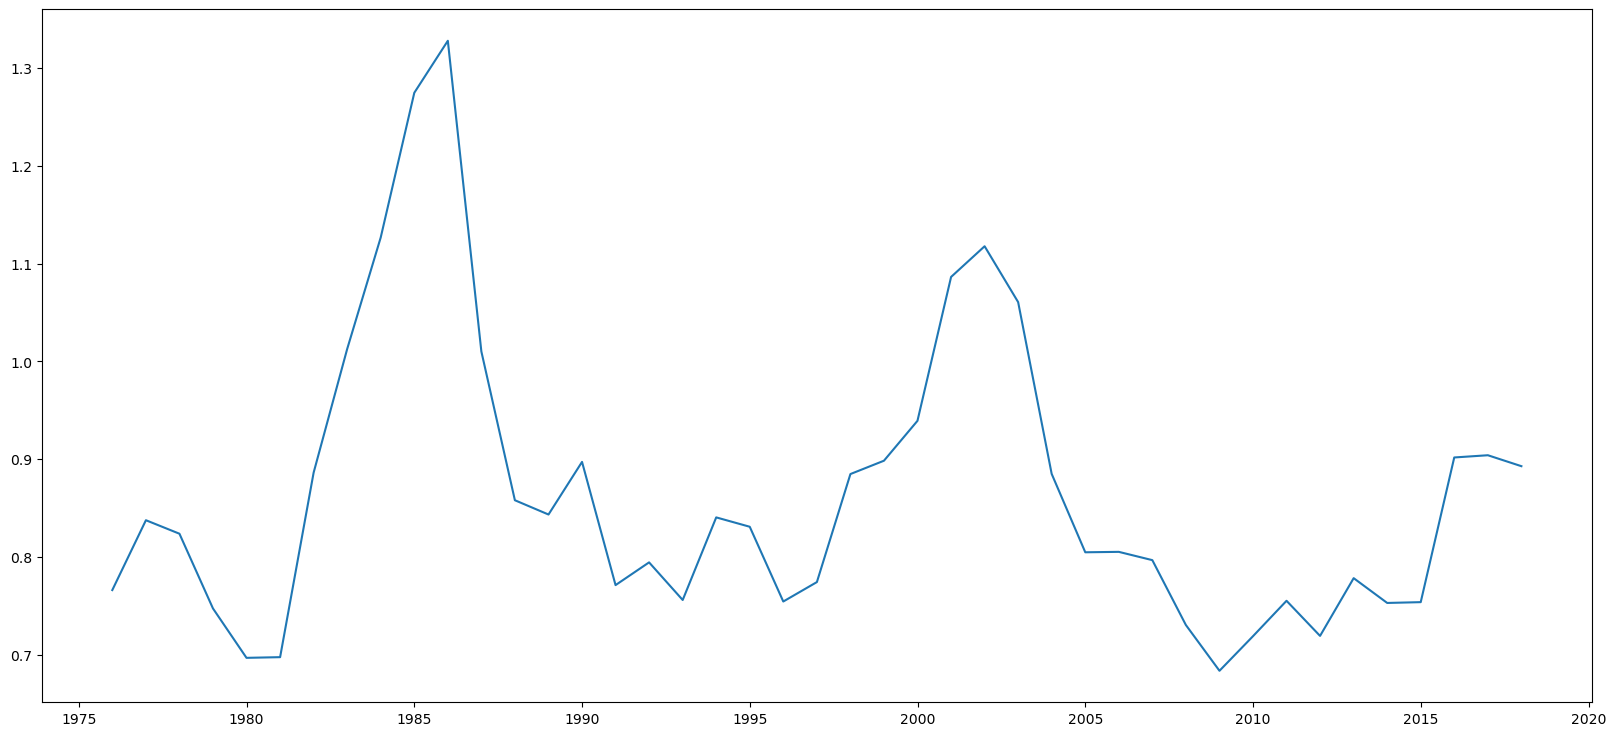

In [38]:
ts_week=ts.resample('Y').mean()
print(ts_week.shape)
plt.plot(ts_week)

(2237,)


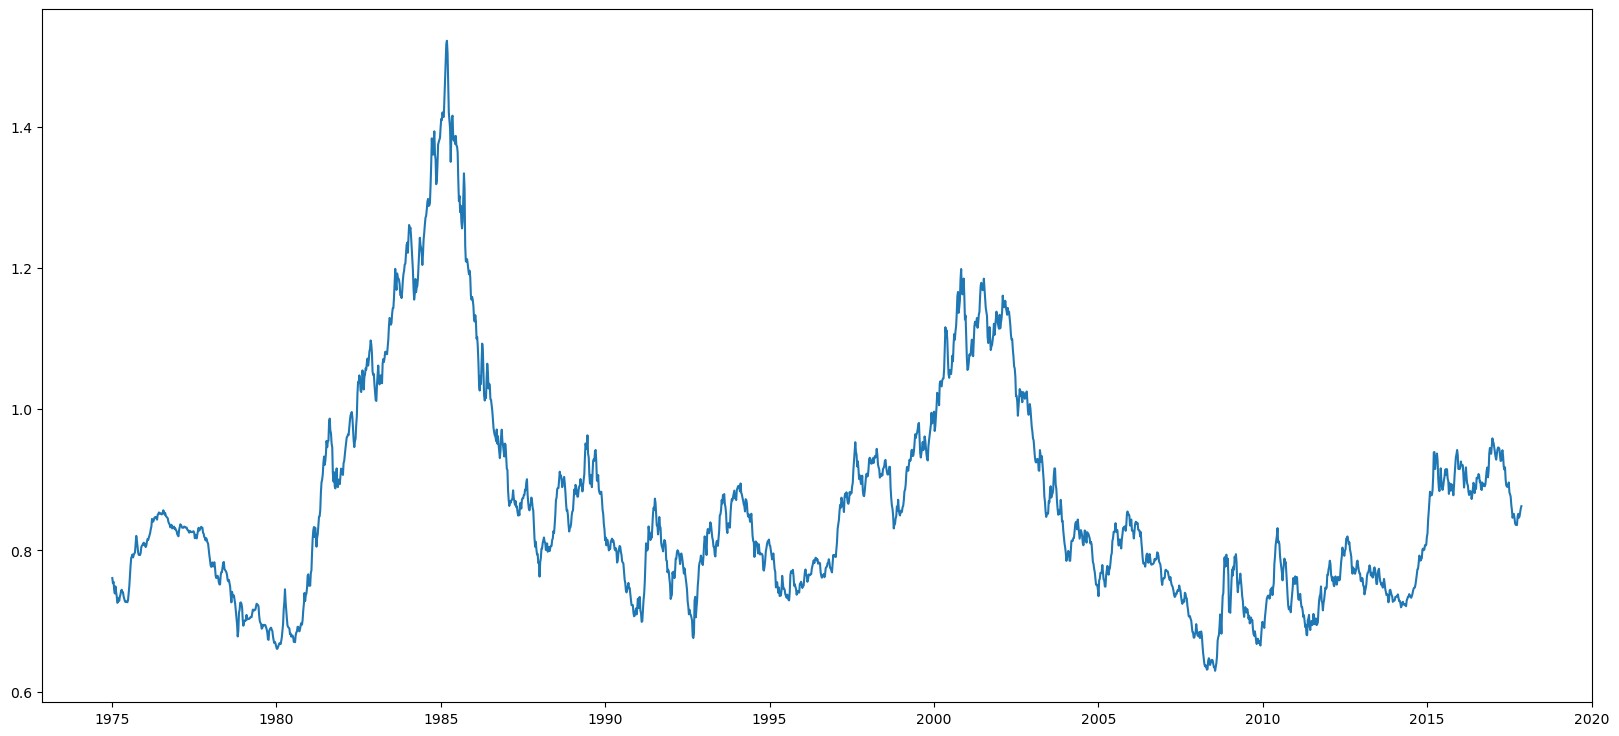

In [39]:
ts_week=ts.resample('W').mean()
print(ts_week.shape)
plt.plot(ts_week)

In [40]:
# To Check number of Records after Resample

ts_week.size

2237

<Axes: xlabel='Date'>

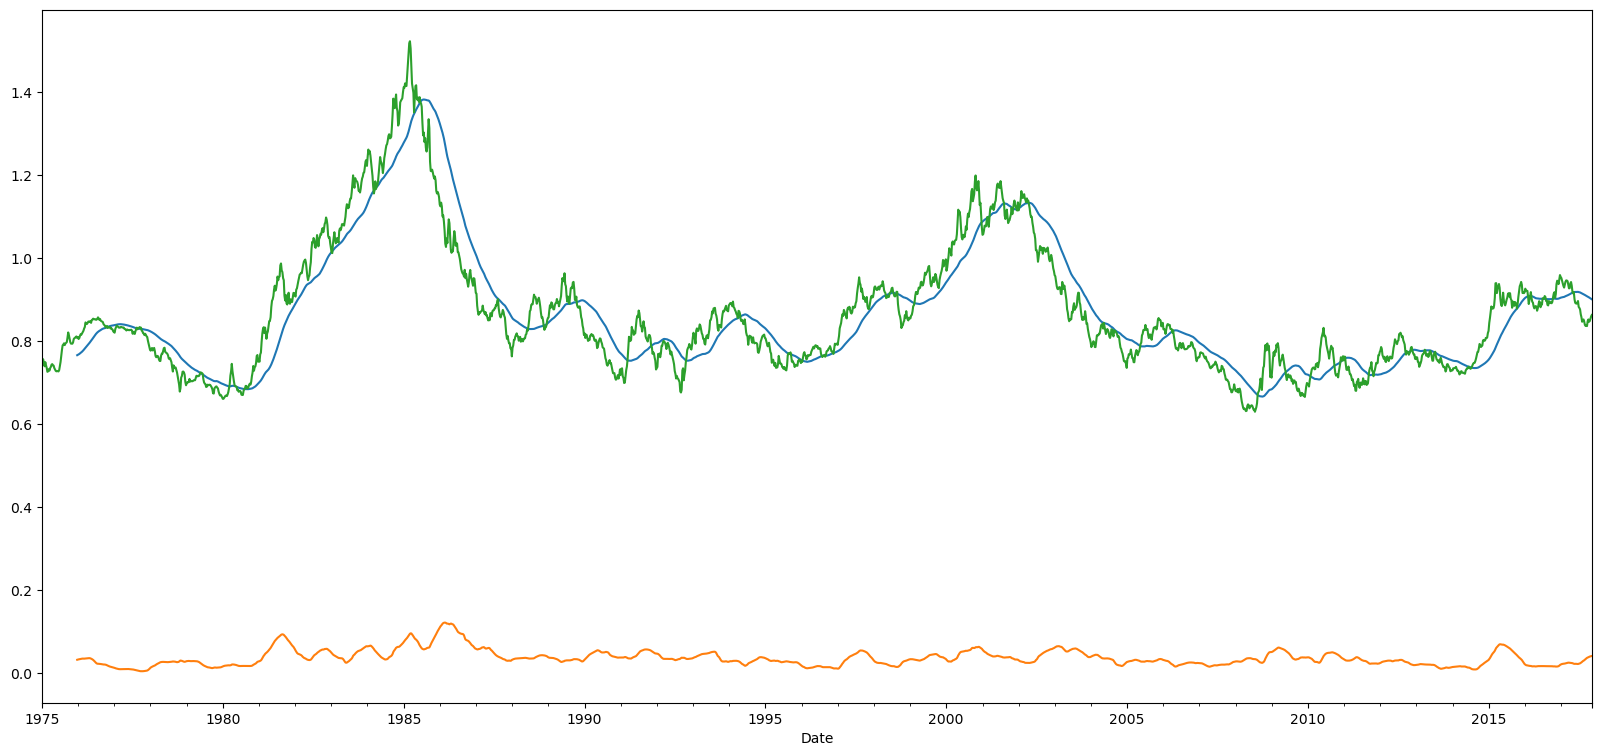

In [41]:
# 52 Week Rolling values

ts_week.rolling(52).mean().plot()
ts_week.rolling(52).std().plot()
ts_week.plot()
 

<Figure size 2000x900 with 0 Axes>

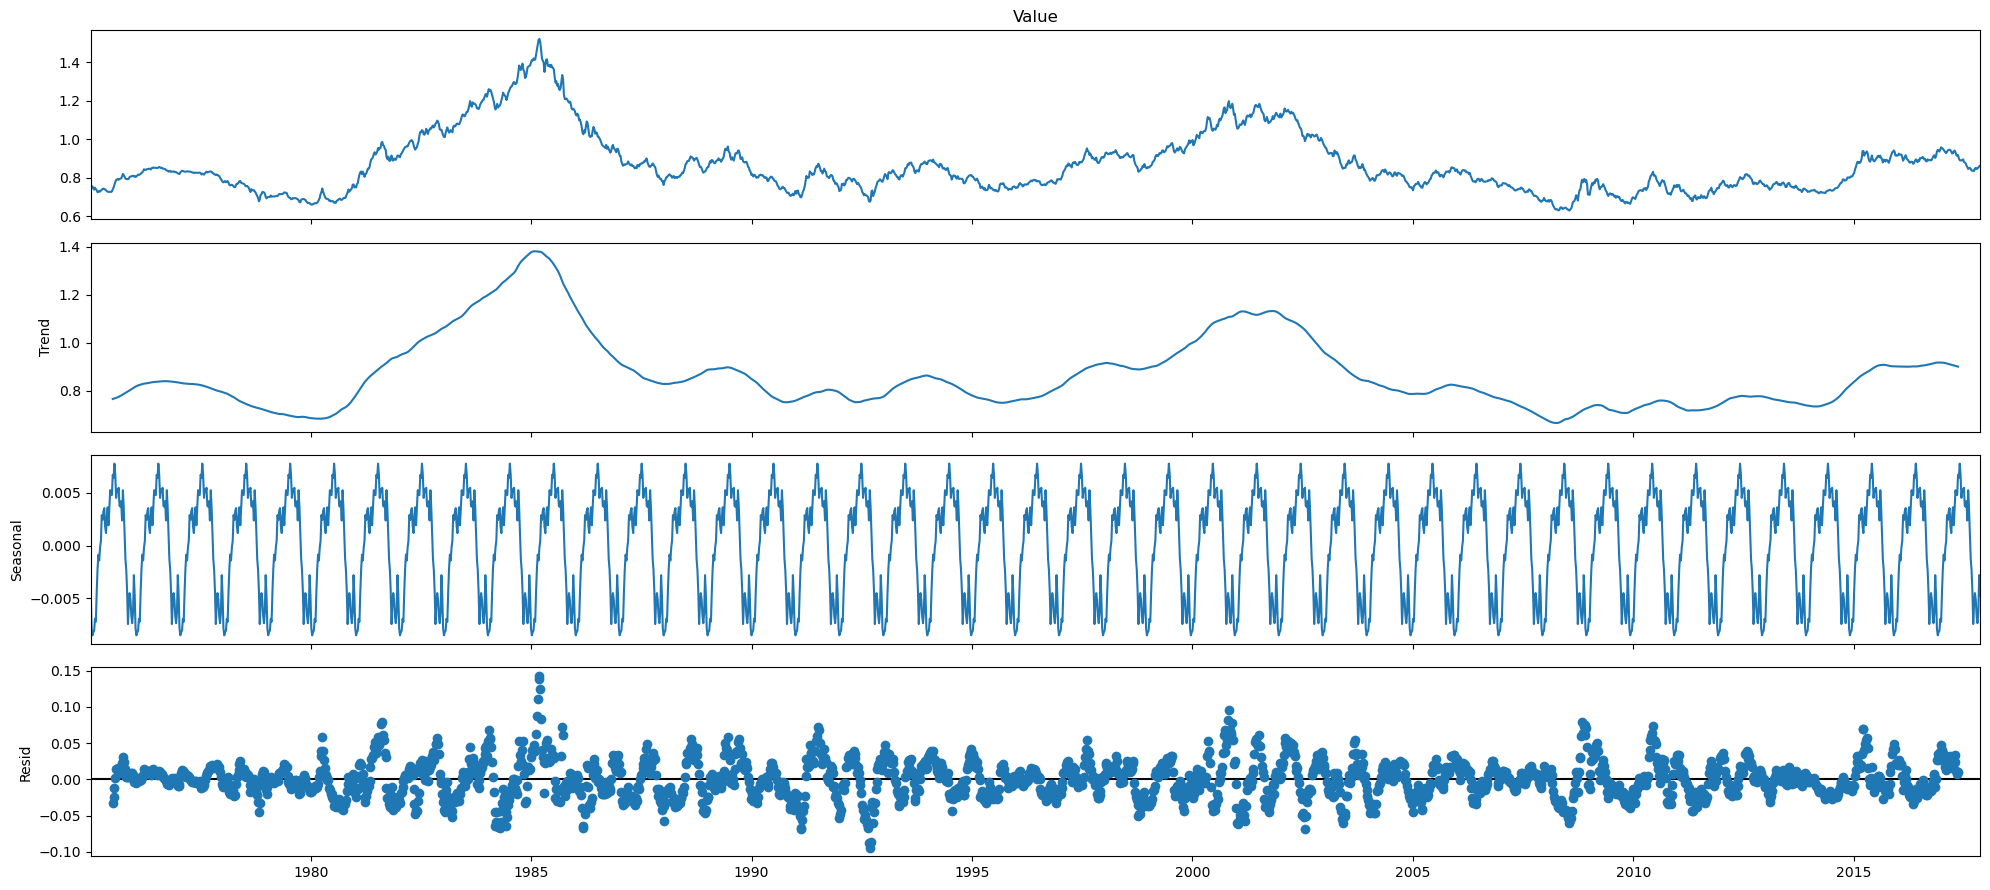

In [42]:
# Decompose the Graph For Trend,Seasonality and lr regular

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(ts_week,period=52)
fig=plt.figure()
fig=decomposition.plot()

In [43]:
# Dickey fuller test to check stationarity

from statsmodels.tsa.stattools import adfuller
result=adfuller(ts_week)
result

(-2.0763405999329887,
 0.25413395509267483,
 2,
 2234,
 {'1%': -3.4332805415364724,
  '5%': -2.8628346299364282,
  '10%': -2.5674591931002038},
 -14013.954809290073)

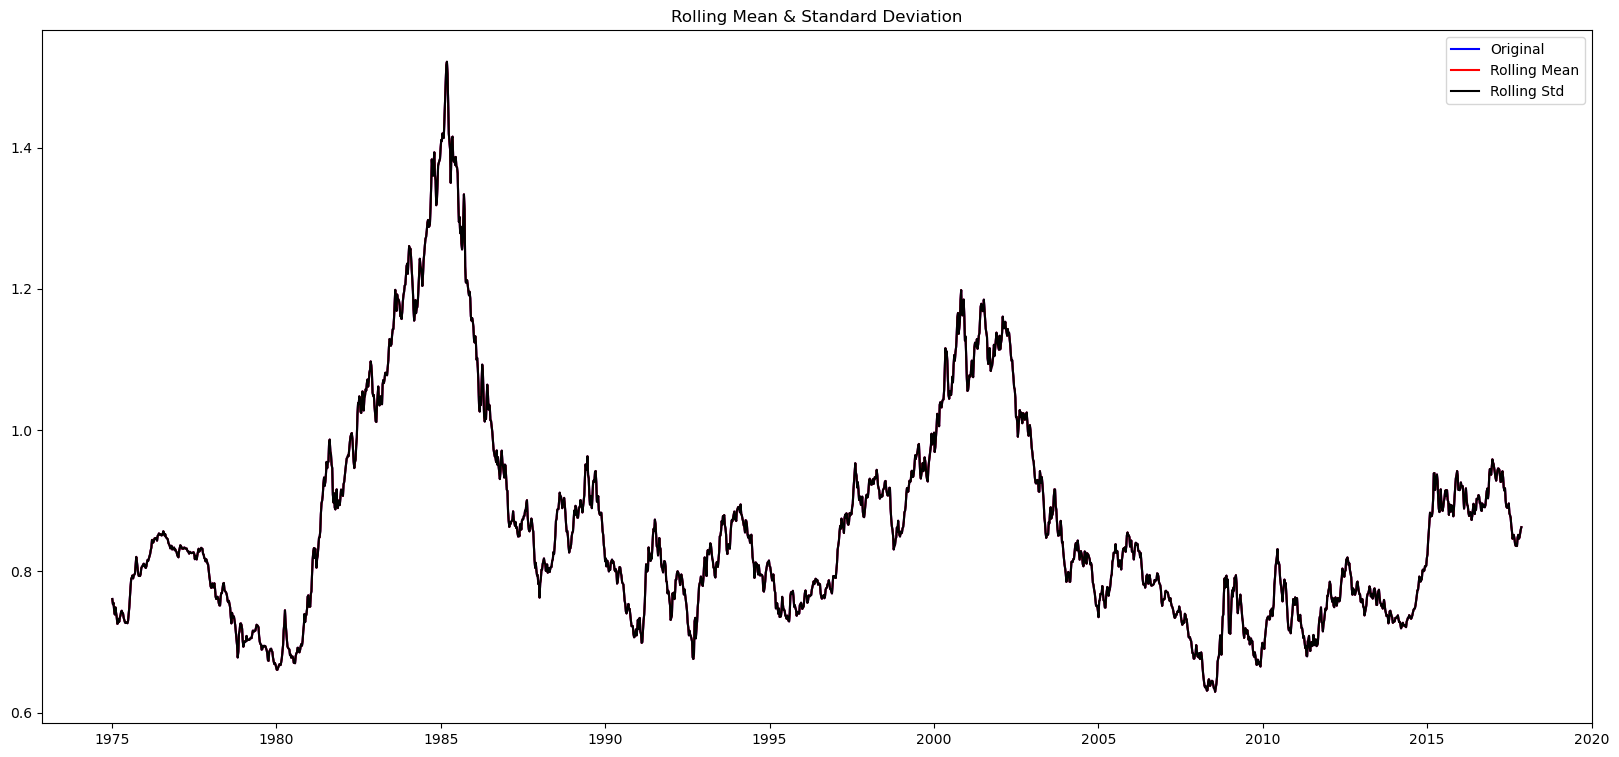

Result of Dickey Fuller Test:
Test Statistic                  -2.076341
p-value                          0.254134
# LagsUsed                       2.000000
Number of Observation Used    2234.000000
Critical Value(1%)              -3.433281
Critical Value(5%)              -2.862835
Critical Value(10%)             -2.567459
dtype: float64


In [44]:
# Fuction to display AD fuller values in proper format

def test_stationary(timeseries):
    # Determingrolling statistics
    rolmean=timeseries.rolling(window=52).mean()
    rolstd=timeseries.rolling(window=52).std()
    # Plot rolling statistics
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(timeseries,color='red',label='Rolling Mean')
    std=plt.plot(timeseries,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    # Perform Dickey - Fuller test:
    print('Result of Dickey Fuller Test:')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','# LagsUsed','Number of Observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key]=value
    print(dfoutput)
test_stationary(ts_week)        

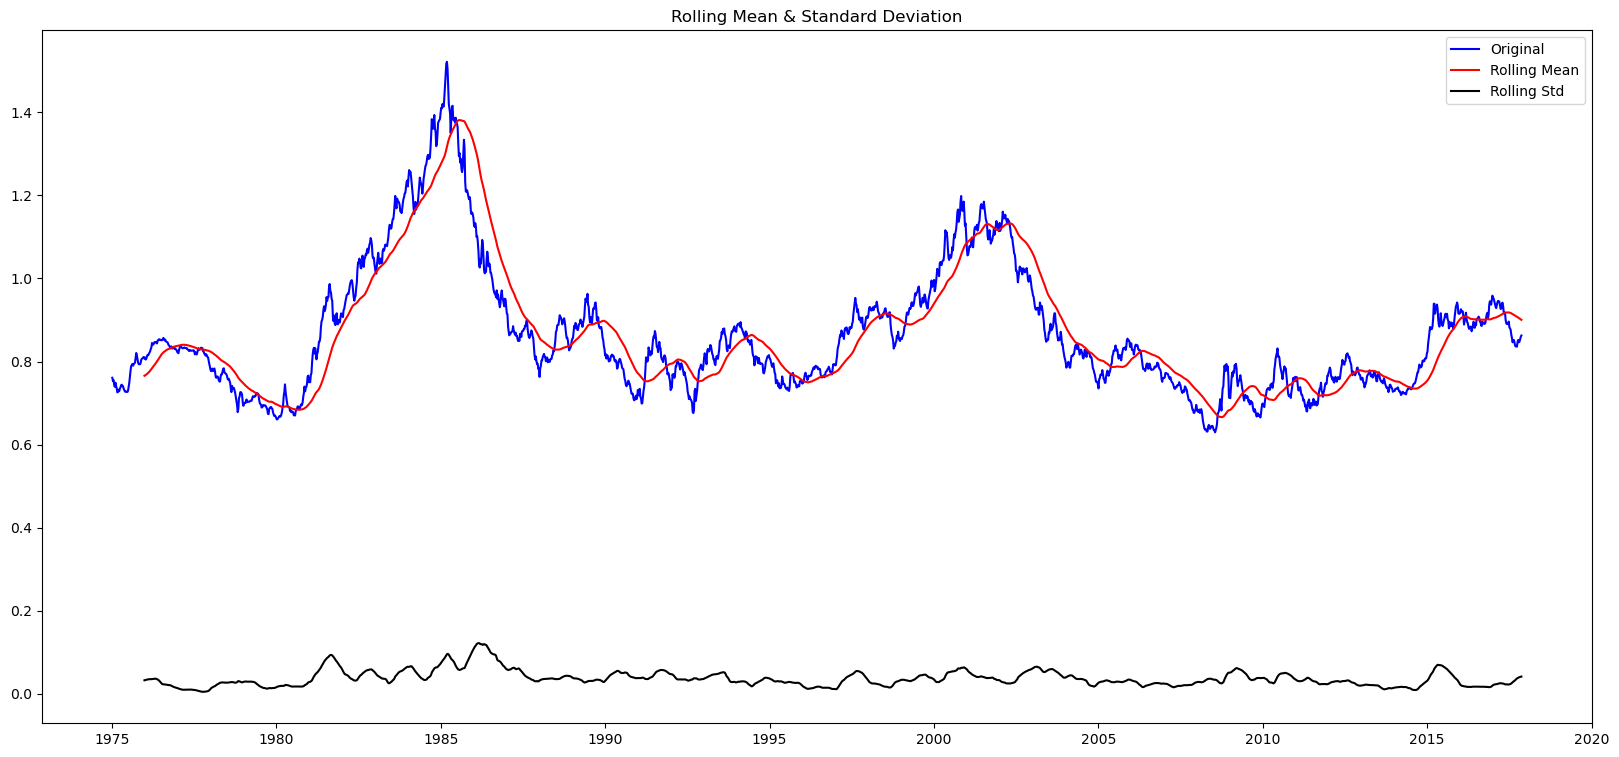

Results of Dickey-Fuller Test:
Test Statistic                   -2.076341
p-value                           0.254134
#Lags Used                        2.000000
Number of Observations Used    2234.000000
Critical Value (1%)              -3.433281
Critical Value (5%)              -2.862835
Critical Value (10%)             -2.567459
dtype: float64


In [45]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean() 
    rolstd = timeseries.rolling(window=52).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(ts_week)


Date
1975-01-05        NaN
1975-01-12   -0.00744
1975-01-19    0.00200
1975-01-26   -0.01158
1975-02-02   -0.00486
               ...   
2017-10-15   -0.00554
2017-10-22    0.00170
2017-10-29    0.00528
2017-11-05    0.00610
2017-11-12    0.00324
Freq: W-SUN, Name: Value, Length: 2237, dtype: float64


<Axes: xlabel='Date'>

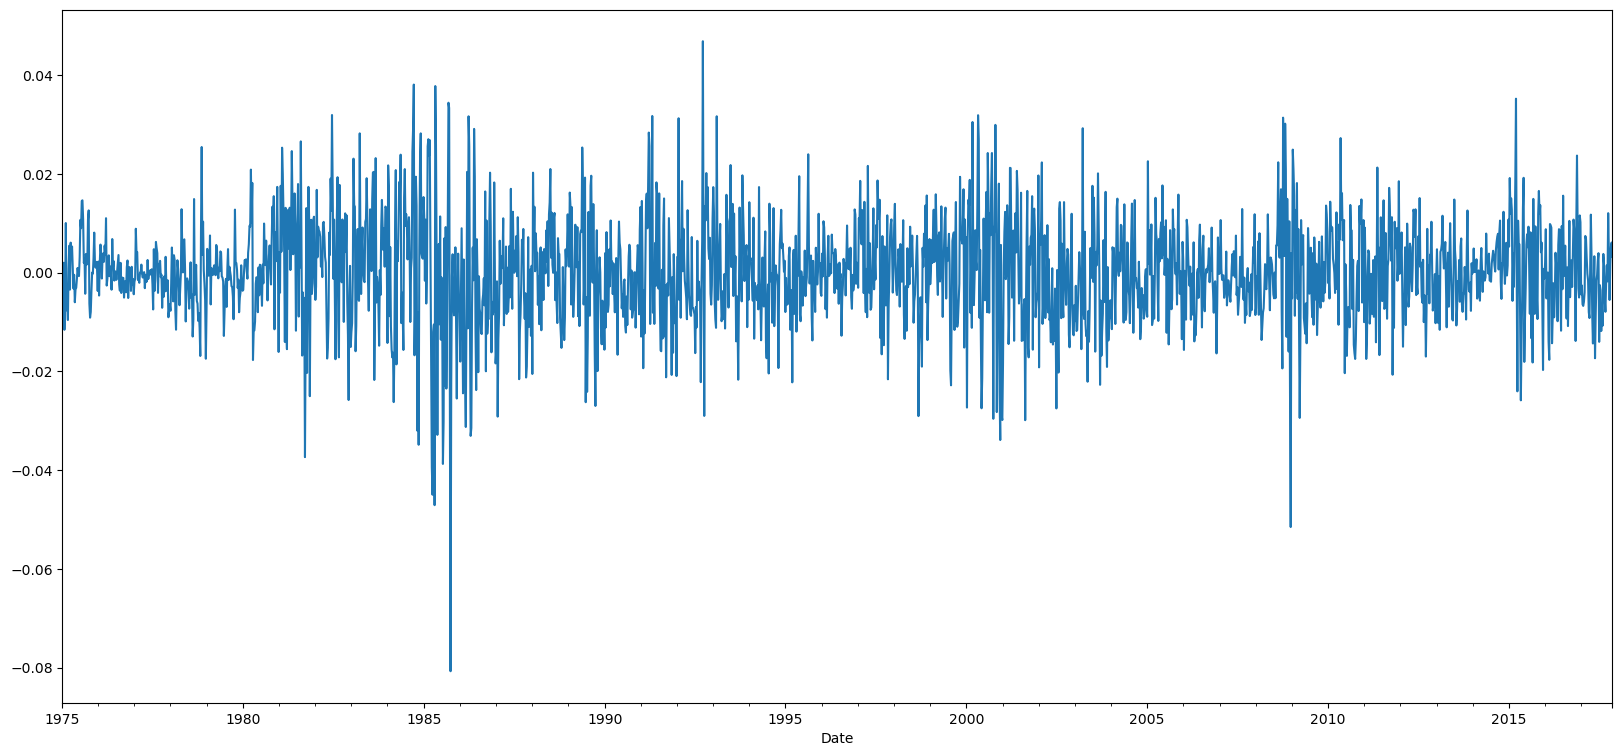

In [46]:
# Diofferencing to make time series stationary 
ts_week_first_diff=ts_week-ts_week.shift(1)
print(ts_week_first_diff)
ts_week_first_diff.plot()

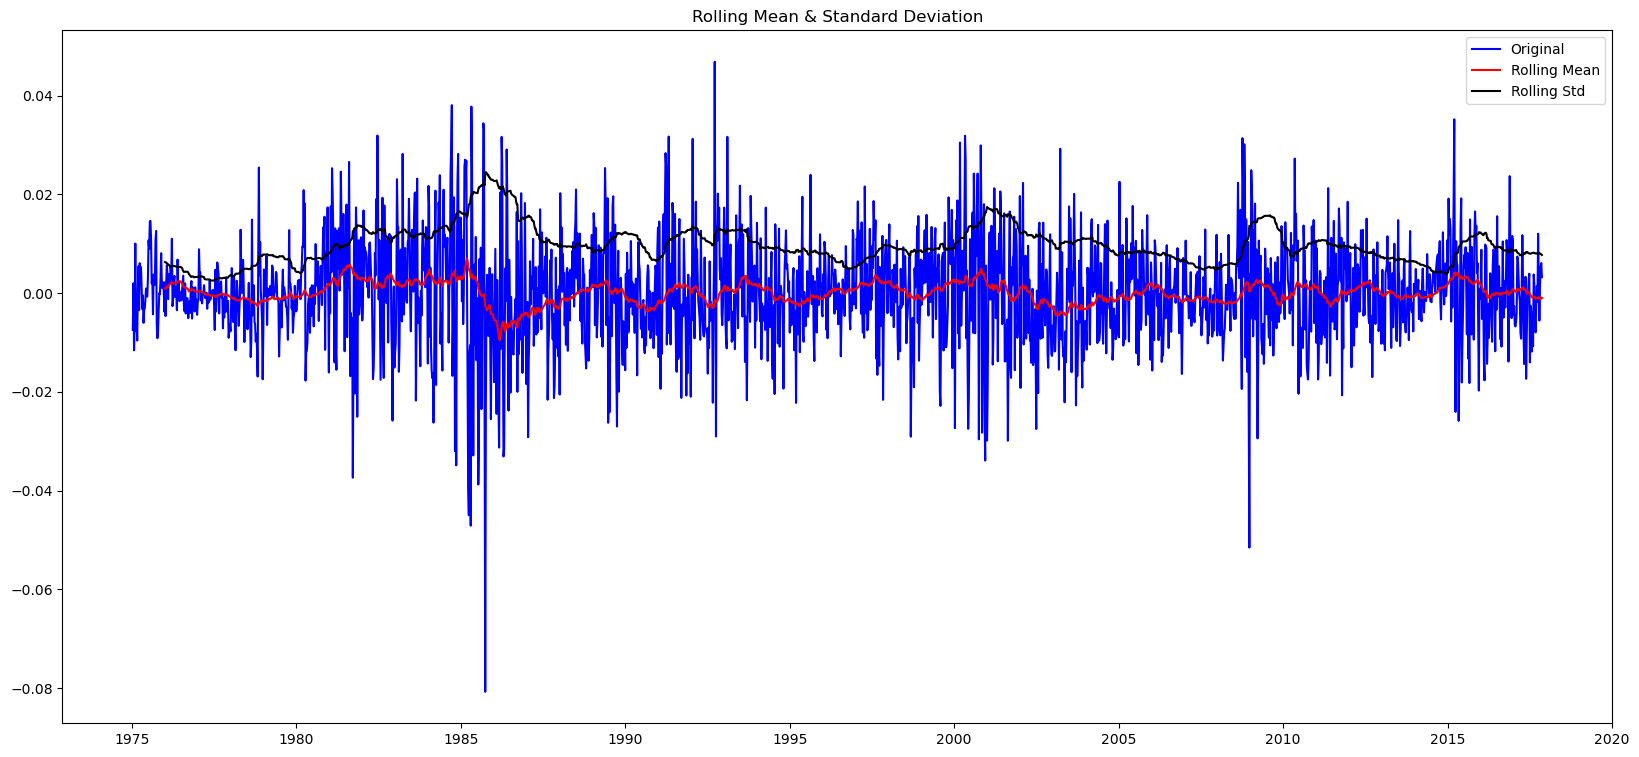

Results of Dickey-Fuller Test:
Test Statistic                  -30.128987
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    2234.000000
Critical Value (1%)              -3.433281
Critical Value (5%)              -2.862835
Critical Value (10%)             -2.567459
dtype: float64


In [47]:
# Dickey Fuller test to check statioanarity(p>0.05,it is stationary), In this case time seriesi stationary d =1

test_stationarity(ts_week_first_diff.dropna())

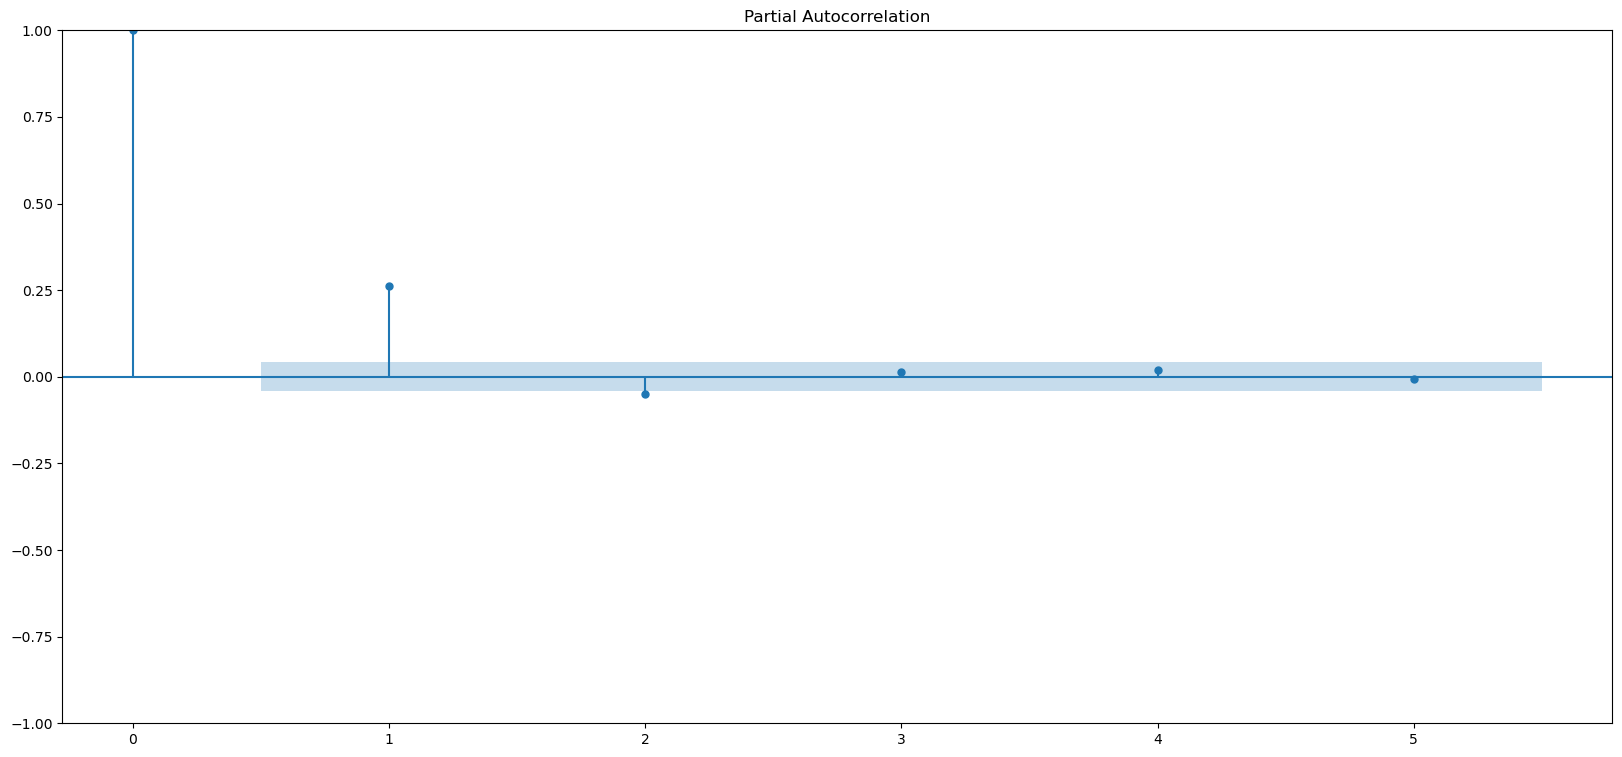

In [48]:
# Check PACF Value (p Value)

fig=sm.graphics.tsa.plot_pacf(ts_week_first_diff.dropna(),lags=5)

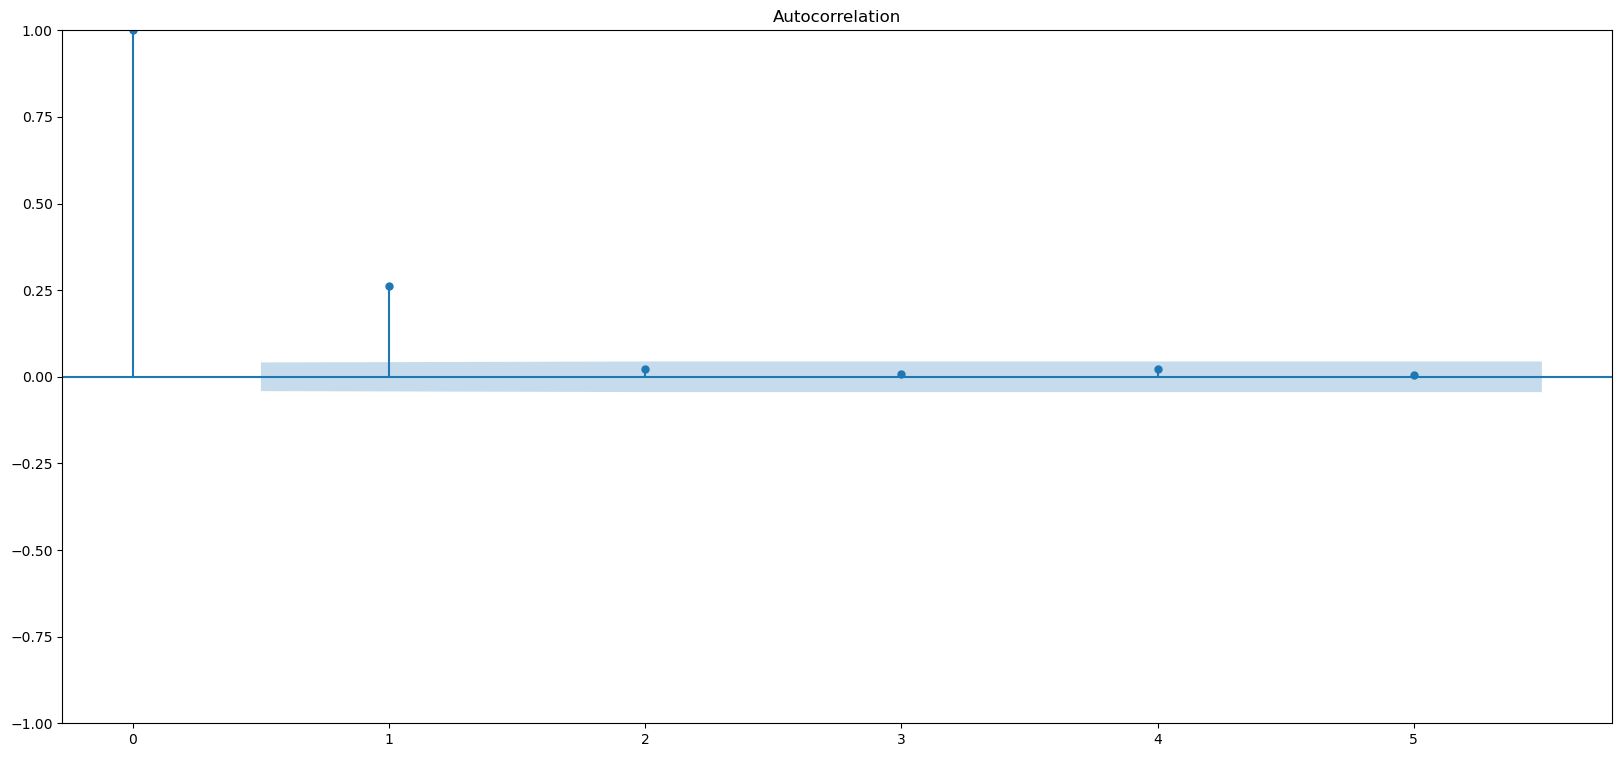

In [49]:
# Check ACF Value (q Value)

fig=sm.graphics.tsa.plot_acf(ts_week_first_diff.dropna(),lags=5)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

Text(0.5, 1.0, 'Residual sum of squares - RSS: 0.8067')

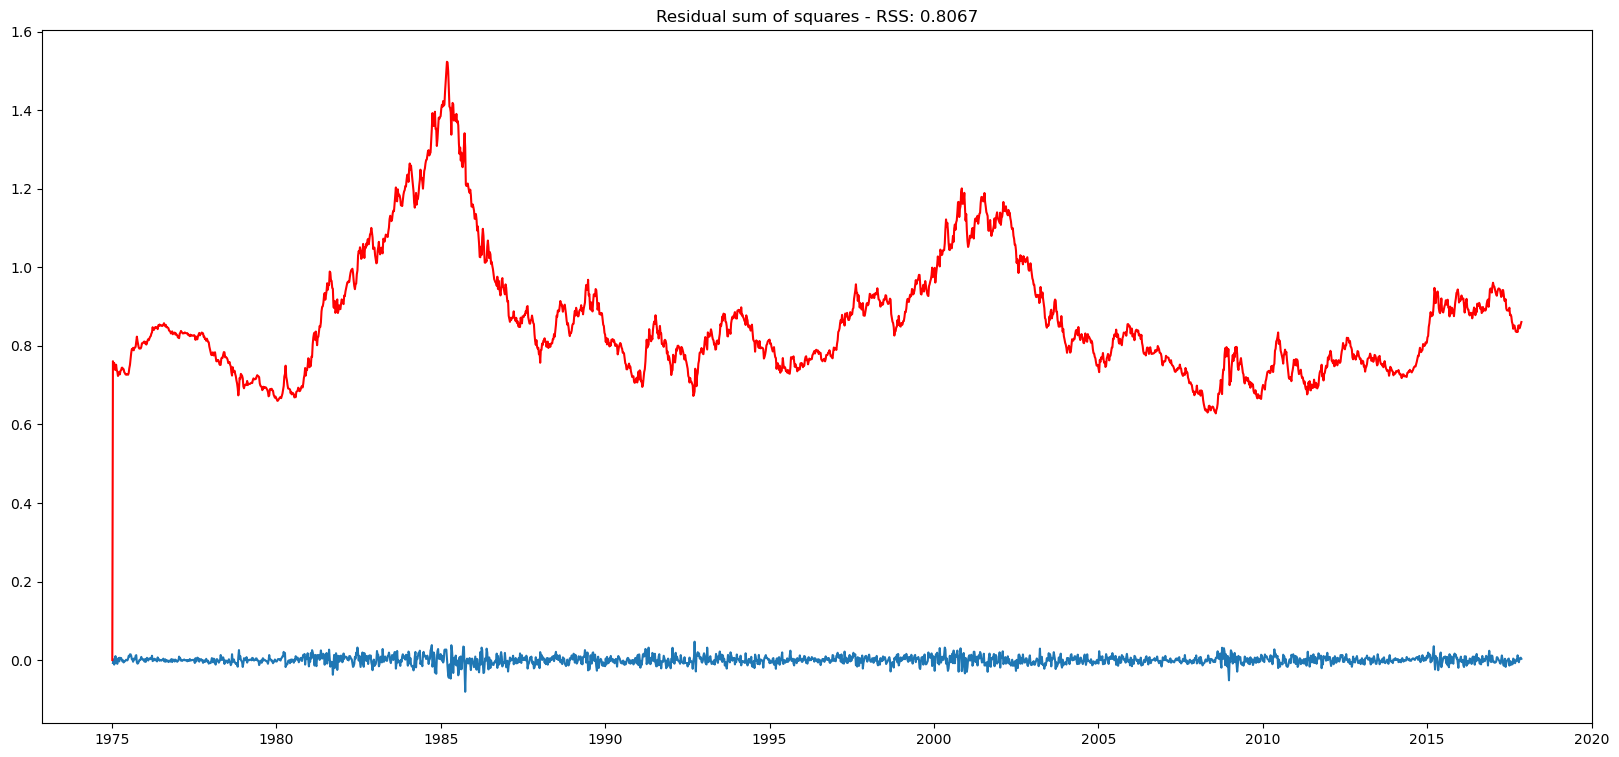

In [55]:
# Create ARIMA Model

model=ARIMA(ts_week,order=(2,1,2))
results_ARIMA=model.fit()
plt.plot(ts_week_first_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('Residual sum of squares - RSS: %.4f'% sum(((results_ARIMA.fittedvalues-ts_week).dropna())**2))


In [56]:
# Prediction

predictions_ARIMA=results_ARIMA.predict()
print(predictions_ARIMA)

Date
1975-01-05    0.000000
1975-01-12    0.760900
1975-01-19    0.751507
1975-01-26    0.756377
1975-02-02    0.740523
                ...   
2017-10-15    0.852265
2017-10-22    0.844653
2017-10-29    0.848751
2017-11-05    0.854580
2017-11-12    0.860793
Freq: W-SUN, Name: predicted_mean, Length: 2237, dtype: float64


In [57]:
# Get the Predictions as original data

predictions_ARIMA=results_ARIMA.predict(typ='levels')
print(predictions_ARIMA)

Date
1975-01-05    0.000000
1975-01-12    0.760900
1975-01-19    0.751507
1975-01-26    0.756377
1975-02-02    0.740523
                ...   
2017-10-15    0.852265
2017-10-22    0.844653
2017-10-29    0.848751
2017-11-05    0.854580
2017-11-12    0.860793
Freq: W-SUN, Name: predicted_mean, Length: 2237, dtype: float64


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                 2237
Model:                 ARIMA(2, 1, 2)   Log Likelihood                7103.850
Date:                Wed, 17 Jul 2024   AIC                         -14197.699
Time:                        16:12:47   BIC                         -14169.137
Sample:                    01-05-1975   HQIC                        -14187.271
                         - 11-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0336     12.778      0.003      0.998     -25.011      25.078
ar.L2          0.0004      1.149      0.000      1.000      -2.251       2.252
ma.L1          0.2423     12.778      0.019      0.9

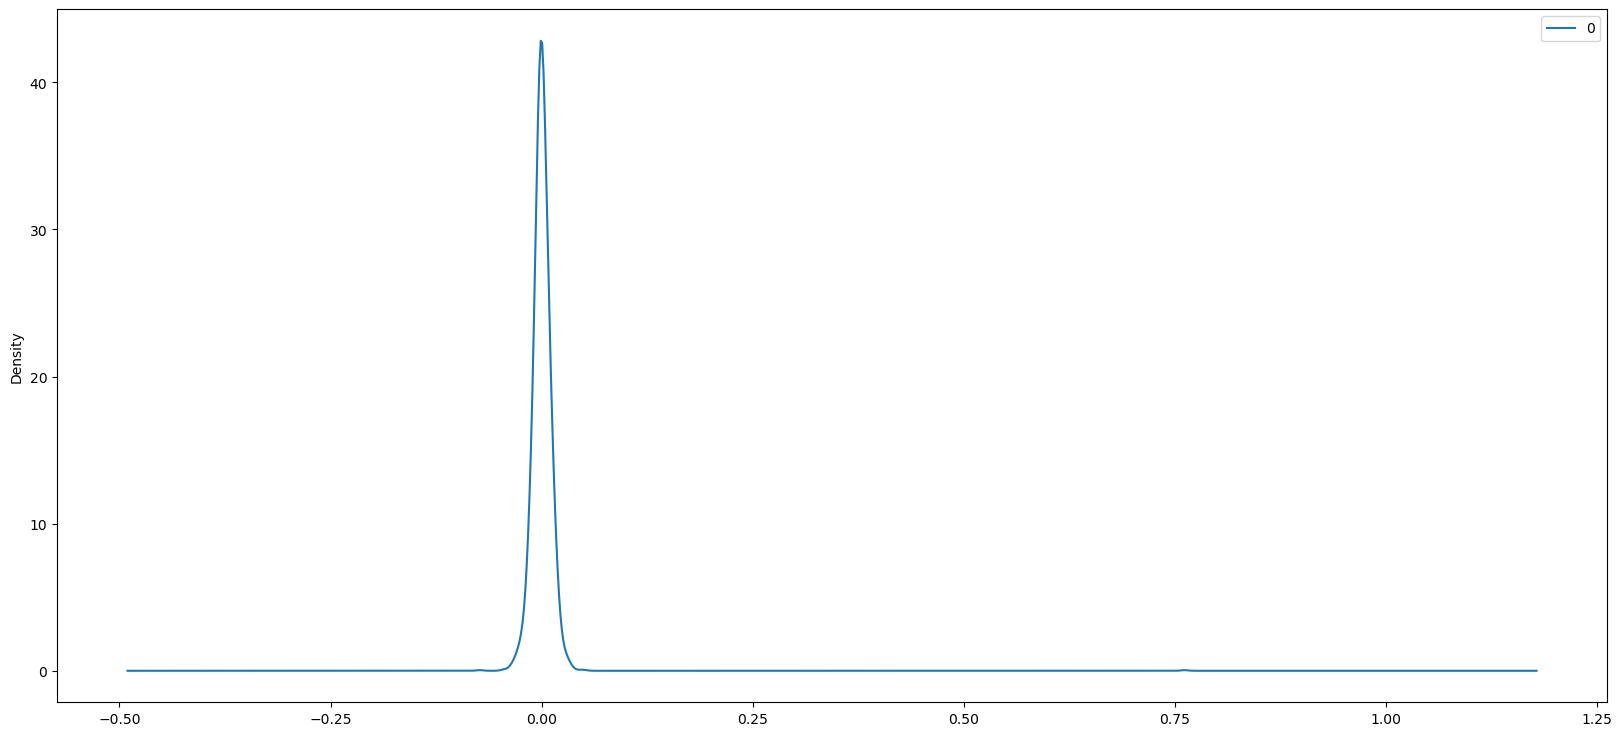

In [58]:
# Prinnt the Summary Statistics

print(results_ARIMA.summary())
residuals=DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')
print(residuals.describe())

In [61]:
# Display and Save values as DataFrame

df_fx_data_final=pd.concat([ts_week,ts_week_first_diff,results_ARIMA.fittedvalues,residuals,predictions_ARIMA],axis=1)
df_fx_data_final.columns=['fx_rate','first_diff','fittedvalue','residuals','predictions']
df_fx_data_final.to_excel('Prajwal FX_Final Data.xlsx')
df_fx_data_final

,fx_rate,first_diff,fittedvalue,residuals,predictions
Date,,,,,
1975-01-05,0.76090,NaN,0.000000,0.760900,0.000000
1975-01-12,0.75346,-0.00744,0.760900,-0.007440,0.760900
1975-01-19,0.75546,0.00200,0.751507,0.003953,0.751507
1975-01-26,0.74388,-0.01158,0.756377,-0.012497,0.756377
1975-02-02,0.73902,-0.00486,0.740523,-0.001503,0.740523
...,...,...,...,...,...
2017-10-15,0.84628,-0.00554,0.852265,-0.005985,0.852265
2017-10-22,0.84798,0.00170,0.844653,0.003327,0.844653
2017-10-29,0.85326,0.00528,0.848751,0.004509,0.848751


In [62]:
ts_week.shape

(2237,)

In [63]:
len(ts_week)-200

2037

In [65]:
#Fit the Train and Predict for Test (Test Size = 200)
import warnings
warnings.filterwarnings('ignore')
size = int(len(ts_week) - 200)
train, test = ts_week[0:size], ts_week[size:len(ts_week)]
history = [x for x in train]
predictions = list()
print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    obs = test[t]
    history.append(obs)
    print('predicted=%f, Actual=%f' % (yhat, obs))



Printing Predicted vs Expected Values...


predicted=0.735459, Actual=0.734280
predicted=0.734106, Actual=0.734900
predicted=0.735121, Actual=0.735020
predicted=0.735008, Actual=0.737720
predicted=0.738469, Actual=0.732460
predicted=0.730893, Actual=0.728220
predicted=0.727328, Actual=0.728660
predicted=0.728894, Actual=0.725080
predicted=0.724052, Actual=0.719400
predicted=0.718017, Actual=0.721380
predicted=0.722129, Actual=0.726360
predicted=0.727582, Actual=0.727220
predicted=0.727274, Actual=0.723320
predicted=0.722259, Actual=0.723575
predicted=0.723816, Actual=0.723575
predicted=0.723517, Actual=0.721960
predicted=0.721536, Actual=0.721050
predicted=0.720867, Actual=0.728960
predicted=0.731153, Actual=0.731380
predicted=0.731680, Actual=0.734350
predicted=0.735156, Actual=0.734180
predicted=0.733995, Actual=0.738020
predicted=0.739120, Actual=0.736420
predicted=0.735792, Actual=0.734740
predicted=0.734405, Actual=0.732900
predicted=0.732433, Actual=0.734720
predicted=0.735295, A

In [66]:
#Print Accuracy – Mean Square Error
 
error = mean_squared_error(test, predictions)
print('\n')
print('Printing Mean Squared Error of Predictions...')
print('Test MSE: %.6f' % error)
predictions_series = pd.Series(predictions, index = test.index)





Printing Mean Squared Error of Predictions...
Test MSE: 0.000069


In [68]:
#Accuracy R2 _score  

from sklearn.metrics import r2_score
r2_score(test, predictions)


0.9858262919617264

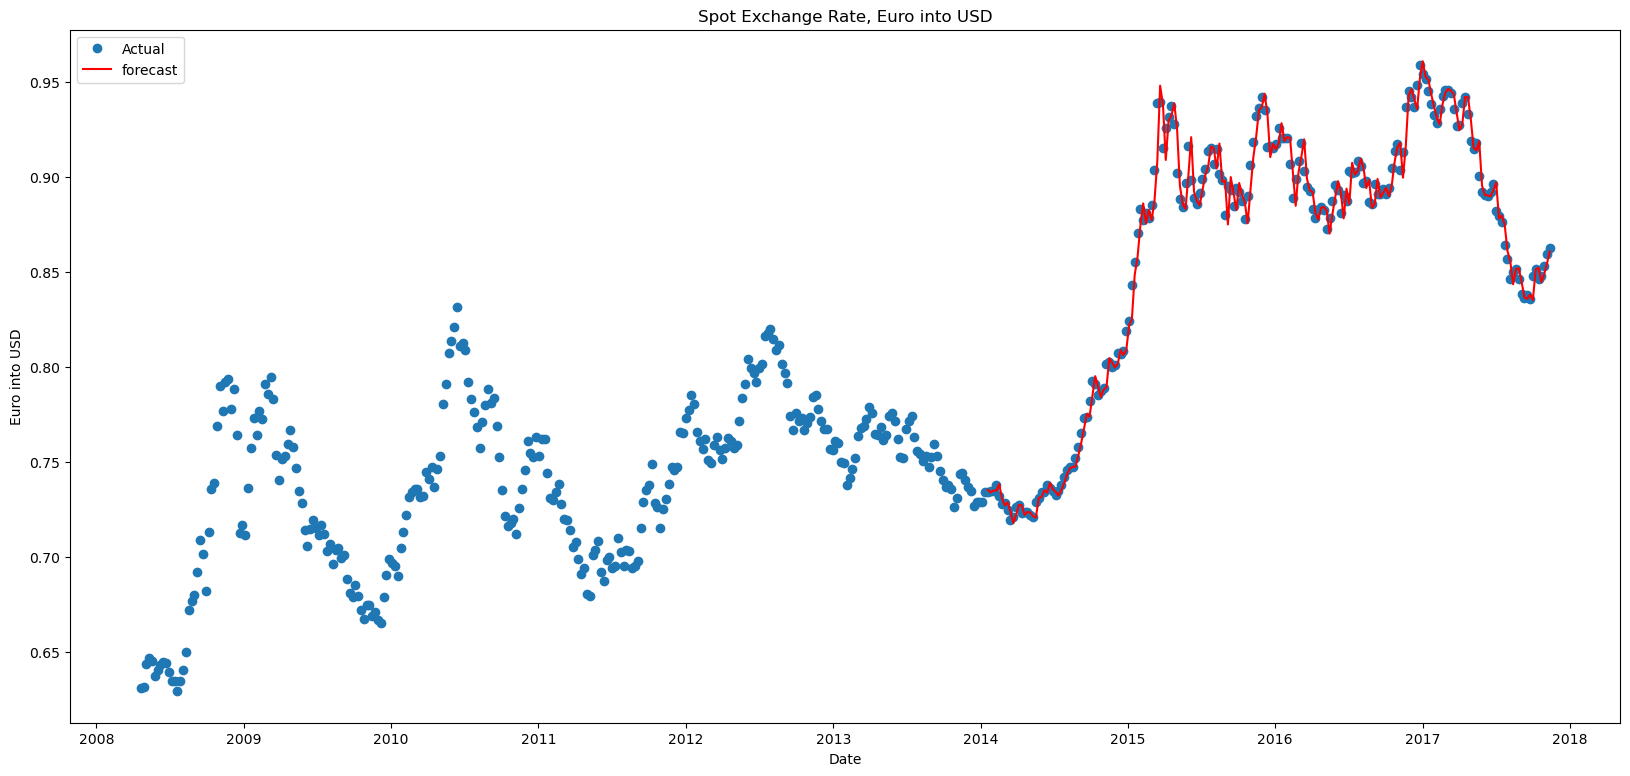

In [69]:
#Plot Test- Actual and Prediction  

fig, ax = plt.subplots()
ax.set(title='Spot Exchange Rate, Euro into USD', xlabel='Date', ylabel='Euro into USD')
ax.plot(ts_week[-500:], 'o', label='Actual')
ax.plot(predictions_series, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')



In [70]:
"Ok Prajwal"

'Ok Prajwal'